# Tuning Neural Networks with Regularization

## Introduction

Now that we've covered the concept behind neural networks as well as some streamlined methods for building such models, we will begin to explore futher concepts involved in tuning and optimizing the performance of these networks. One important aspect is reducing the time and resources needed to train these models. In previous lessons, when importing the Santa images, we immediately reduces each image to an extremely pixelated 64x64 representation. On top of that, we further downsampled our dataset to reduce the number of observations. This was because training neural networks is resource intensive and is often a time consuming process as a result. Finally, not only do we wish to reduce production time, we also naturally want to improve the accuracy and performance of these models. In this lesson, we will begin to examine various techniques related to these goals, beginning with the discussion of validation sets.

## Objectives
You will be able to:
* Explain the relationship between bias and variance
* Explain general rules of thumb for improving neural networks based on initial bias and variance measurements

## Hyperparameters and iterative deep learning

### There are many hyperparameters you can tune

- number of hidden units
- number of layers
- learning rate alpha
- activation function
... how to choose? 

## Training, Validation and Test Sets

In the previous labs, we have been inconsistent about what to do regarding testing our models when trying to optimize them. For our santa examples, we have been using a training and a test set, but for the two circles example, we were both training and evaluating on the same data!

Let's formalize how we'll proceed doing this. The fact that there are so many hyperparameters to tune calls for a formalized and unbiased approach. You've seen before that you want to use a training and a test set, because it is "unfair" to evaluate your model on the same data you used to select a certain model. 

In short, we'll use 3 sets when running, selecting and validating a model:
- You train algorithms on the training set
- You'll use a validation set to decide which one will be your final model after parameter tuning
- After having chosen the final model (and having evaluated long enough), you'll use the test set to get an unbiased estimate of the classification performance (or whatever your evaluation metric will be).

With big data, your dev and test sets don't necessarily need to be 20-30% of all the data. You can choose test and hold-out sets that are of size 1-5%. eg. 96% train, 2% hold-out, 2% test set. 

Remember that it is **VERY IMPORTANT** to make sure holdout and test sample come from the same distribution: eg. same resolution of santa pictures. 

What we did before is actually use the holdout set as a test set as well! actually our "test set" was a holdout set. You're basically overfitting to the test set!

## Bias and variance in deep learning

## Our circles example


In classical models and machine learning, often one talks about a "bias-variance trade-off". We'll discuss these concepts here, and tell how deep learning is slightly different and a trade-off isn't always present!

Bias = underfitting

high variance = overfitting

good fit --> somewhere in between

examples: let's take another look at our two circles data, the data looked like this:

![title](figures/example.png)

Remember that we fit a logistic regression model to the data here. We got something that looked like the picture below. The model didn't do a particularly good job at discriminating between the yellow and purple dots. We would say this is a model with a **high bias**, the model is **underfitting**.

![title](figures/underfitting.png)

When using a neural network, what we reached in the end was a pretty good decision boundary, a circle discriminating between the yellow and purple dots:

![title](figures/good.png)

At the other end of the spectrum, we might experience **overfitting**, where we create a circle which is super sensitive to small deviations of the colored dots. An example below. We also call this a model with **high variance**.

![title](figures/overfitting.png)

## The Santa Example

In [4]:
!pip install Pillow

    100% |████████████████████████████████| 2.0MB 11.4MB/s ta 0:00:01
smart-open 1.8.0 requires bz2file, which is not installed.
nltk 3.4 requires singledispatch, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from PIL import Image

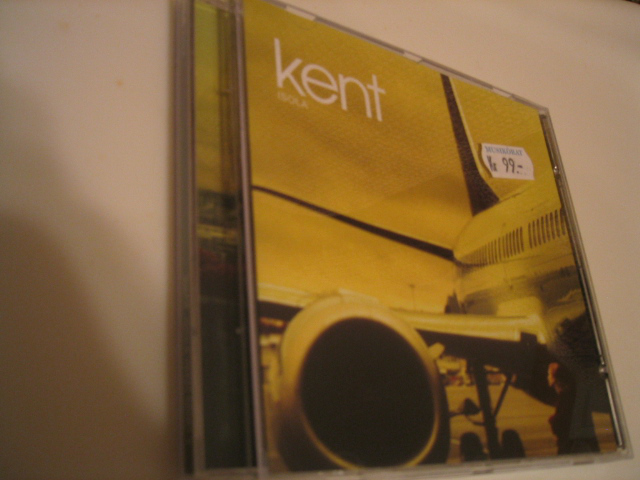

In [22]:
from PIL import Image, ImageDraw
myImage = Image.open("figures/NS_1.jpg");
myImage


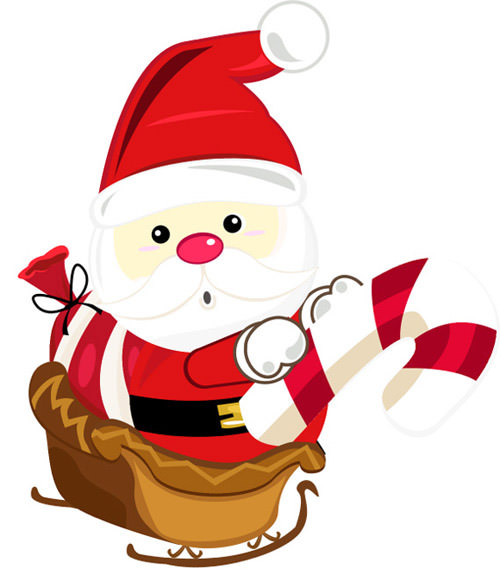

In [23]:
myImage2 = Image.open("figures/S_4.jpg");
myImage2

|       | high variance | high bias   | high variance & bias | low variance and bias |
|-------|---------------|-------------|----------------------|-----------------------|
|train set error|   12% | 26%         | 26%                  | 12%                  |
|validation set error|   25% | 28%         | 40%                   | 13%                   |

Assume that our best model can get to a validation set accuracy of 87%. Note that "high" and "low" are relative! Also, in deep learning there is less of a bias variance trade-off!

## Rules of Thumb Regarding Bias / Variance

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |

## Regularization

Use regularization when when overfitting is occurring.

## L1 and L2 regularization

## In logistic regression

Let's look back at the logistic regression-example. with lambda a regularization parameter (another hyperparameter you have to tune).

$$ J (w,b) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}||w||_2^2$$

$$||w||_2^2 = \sum^{n_x}_{j=1}w_j^2= w^Tw$$

This is called L2-regularization. You can also add a regularization term for $b$, but $b$ is just one parameter. L2-regularization is the most common type of regularization.

L1-regularization is where you just add a term:

$$ \dfrac{\lambda}{m}||w||_1$$ (could also be 2 in the denominator)




## In a neural network

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$

$$||w^{[l]}||^2 = \sum^{n^{[l-1]}}_{i=1} \sum^{n^{[l]}}_{j=1} (w_{ij}^{[l]})^2$$

this matrix norm is called the "Frobenius norm", also referred to as $||w^{[l]}||^2 _F$


How does backpropagation change now?
whichever expression you have from the backpropagation, and add $\dfrac{\lambda}{m} w^{[l]}$.
So,

$$dw^{[l]} = \text{[backpropagation derivatives] }+ $\dfrac{\lambda}{m} w^{[l]}$$ 

Afterwards, $w^{[l]}$ is updated again as $w^{[l]}:= w^{[l]} - \alpha dw^{[l]} $

L2-regularization is called weight decay, because regularization will make your load smaller:

$$w^{[l]}:= w^{[l]} - \alpha \bigr( \text{[backpropagation derivatives] }+ \dfrac{\lambda}{m} w^{[l]}\bigr)$$

$$w^{[l]}:= w^{[l]} - \dfrac{\alpha\lambda}{m}w^{[l]} - \alpha \text{[backpropagation derivatives]}$$

hence your weights will become smaller by a factor $\bigr(1- \dfrac{\alpha\lambda}{m}\bigr)$.

Intuition for regularization: the weight matrices will be penalized from being too large. Actually, the network will be forced to almost be simplified.
Also: eg, tanh function, if $w$ small, the activation function will be mostly operating in the linear region and not "explode" as easily.

## Dropout Regularization

For each node, drop a coin and drop them out (you can also alter the dropout probability to be different from 0.5).


#### Implement dropout for layer l. 

Let's implement a dropout vector for layer l, denoted by $dl$:


```
Specify

keep_prob = 0.8
dl = np.random.rand(al.shape[0], al.shape[1]) < keep_prob
```
Activations:

```
al = np.multiply(al,dl)
```

--> there is a 20% chance that each of the elements is 0, you'll zero out the corresponding element. As a last step, you need to divide a1 by `keep_prob`, in order to not reduce the expected value of $z^{[l+1]}$

```
a1 /= keep_prob 
```

In different iterations through the training set, different nodes will be zeroed out!

#### When making predictions, don't do dropout!

Why does dropout regularization work? The idea is that we train the network in a way that in cannot rely on any specific feature, so the weights are spread out.

## Other types of regularization

At the end of the upcoming lab, we'll further explore two more types of regularization:
* Data augmentation
* Early stopping

## Summary

In this lesson we began to explore how to further tune and optimize out of the box neural networks built with Keras. This included regularization analagous to our previous machine learning work, as well dropout regularization, used to further prune our networks. In the upcoming lab you'll get a chance to experiment with these concepts in practice and observe their effect on your models outputs.